# Quickstart: Target x Survey

learn how to merge target inside a survey and simulate a dataset (observed version of target's data)

In [1]:
from skysurvey import survey, target

Following what we learned in Quickstart: target, let's create a SNeIa dataset of 5 000 targets

### Target | data given by nature

In [2]:
%%time
snia = target.SNeIa.from_draw(500)

CPU times: user 297 ms, sys: 13.5 ms, total: 310 ms
Wall time: 312 ms


let's check when "nature started"

In [3]:
starting_date = snia.data["t0"].min()-50 # 50 days before the first target, no need to simulate a survey before that

### Survey | What has been observed when and how. Here ZTF case

In [4]:
%%time
ztf = survey.ZTF.from_random(size=365*2*500, # number of observation  2 years, 500 per day, small for the doc
                     bands=["ztfg","ztfr","ztfi"], # band to observed
                     mjd_range=[starting_date, starting_date+365*4], # timerange of observation
                     skynoise_range=[10,20], # sky noise
                     )

CPU times: user 704 ms, sys: 45 ms, total: 749 ms
Wall time: 758 ms


### Target in Survey | let's check which target belongs to which field.

This is particularly optiomized thanks to a combination of shapely, pandas and geopandas

In [7]:
%%time
fieldid_of_targets = ztf.radec_to_fieldid(snia.data[["ra","dec"]].values)

CPU times: user 29.4 ms, sys: 2.77 ms, total: 32.2 ms
Wall time: 39 ms


In [8]:
fieldid_of_targets

,fieldid
index_radec,
0,458
0,1504
1,1661
1,1662
1,664
...,...
498,1692
498,694
499,783


### DataSet | The object that exploite the target x survey combination.

In [9]:
from skysurvey import DataSet

this not only match then SN with the target but already simulate the obseving point. 

In [10]:
%%time
dset = DataSet.from_targets_and_survey(snia, ztf)

CPU times: user 2.5 s, sys: 63.9 ms, total: 2.56 s
Wall time: 2.56 s


In [11]:
dset.data

fieldid          time  band       flux    fluxerr    zp zpsys
index                                                                      
344   5447        199  55972.347656  ztfr  -6.720069  12.746425  25.0    ab
      8518        199  55984.535156  ztfg   0.249437  18.556173  25.0    ab
      9835        199  55989.562500  ztfg   8.388445  15.568666  25.0    ab
      13112       199  56002.988281  ztfi   2.395748  18.125595  25.0    ab
      13705       199  56005.488281  ztfr  21.348891  16.354838  25.0    ab
...               ...           ...   ...        ...        ...   ...   ...
289   357602     1895  57380.433594  ztfr   1.276450  16.059053  25.0    ab
      358082     1895  57382.363281  ztfr  23.098223  16.139620  25.0    ab
      360734     1895  57393.062500  ztfi  19.760541  17.794781  25.0    ab
      362830     1895  57401.339844  ztfi -41.647041  14.575265  25.0    ab
      364667     1895  57408.808594  ztfi  11.506163  18.682911  25.0    ab

[230426 rows x 7 columns]

z         0.195500
x1       -0.100000
c         0.080000
t0    56882.218750
x0        0.000076
Name: 90, dtype: float32

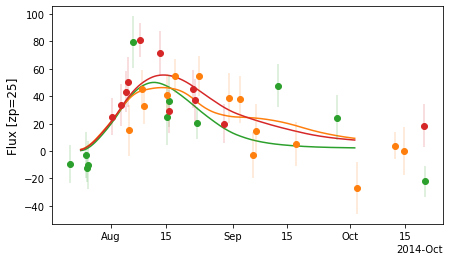

In [12]:
_ = dset.show_target_lightcurve(index=90, phase_window=[-30, 70])
dset.targets.get_template_parameters(index=90)

In [13]:
%%time
dset.get_ndetection(per_band=True)

CPU times: user 27.4 ms, sys: 8.91 ms, total: 36.3 ms
Wall time: 38.8 ms


index  band
0      ztfg    1
       ztfi    3
       ztfr    1
1      ztfg    0
       ztfi    1
              ..
498    ztfi    0
       ztfr    2
499    ztfg    3
       ztfi    2
       ztfr    1
Name: detected, Length: 1497, dtype: int64